# Telco Customer Churn Various Model Applications
### Author: nxiu(mfurkanatac)

### Process:
- Data Preprocessing
- Data Visualization
- Data Modeling
- Model Evaluation

### Data Preprocessing

In [5]:
# import basic libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

# import data and show first 5 rows
data = pd.read_csv("churn.csv")
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


### Data Visualization

In [2]:
print(data.columns)

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')


In [7]:
# check for missing values and data types, then convert to numeric (we need to do this for the correlation matrix)
le = LabelEncoder()
data = data.apply(le.fit_transform)

<Axes: >

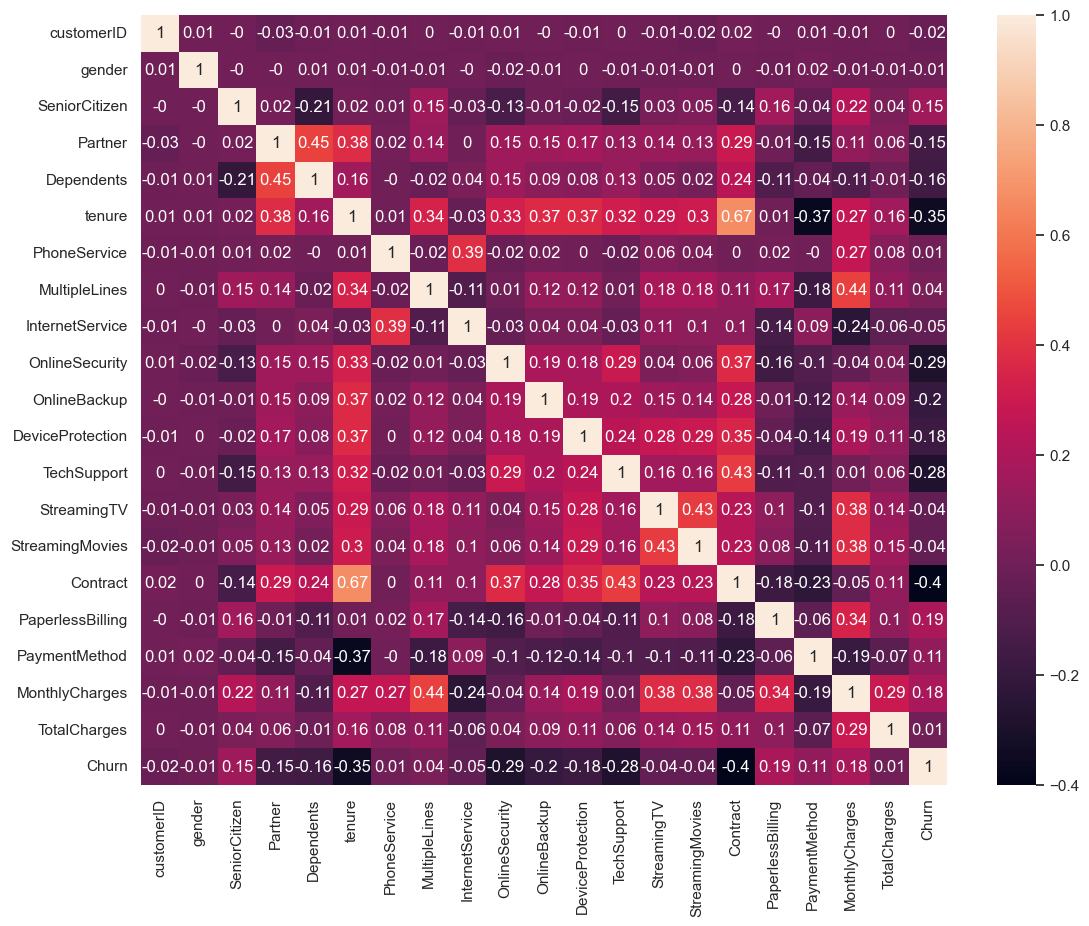

In [12]:
# we will apply correlation matrix on seaborn
import seaborn as sns
sns.set(rc={'figure.figsize':(13,10)})
corr = round(data.corr(), 2) # round to 2 decimal places for better readability
sns.heatmap(corr, annot=True)

In [13]:
# we get rid of the columns that are not relevant for our analysis (we will not use them in our model)
# we compared their correlation with Churn column
data.drop(['customerID', 'gender', 'PhoneService', 'MultipleLines', 'InternetService', 'StreamingTV', 'StreamingMovies', 'TotalCharges'], axis=1, inplace=True)

In [14]:
from sklearn.model_selection import train_test_split
X = data.drop(columns = ['Churn'])
X_train, X_test, y_train, y_test = train_test_split(X, data["Churn"].values, test_size=0.3)

In [26]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [30]:
clf_gini = DecisionTreeClassifier(criterion = "entropy", max_depth=3, min_samples_leaf=5)
  
# Performing training
clf_gini.fit(X_train, y_train)

y_pred = clf_gini.predict(X_test)
print("Predicted values:")
print(y_pred)

print("Confusion Matrix: \n", confusion_matrix(y_test, y_pred))
    
print ("Accuracy : ", accuracy_score(y_test,y_pred)*100)
    
print("Report : ", classification_report(y_test, y_pred))

Predicted values:
[1 0 0 ... 0 0 1]
Confusion Matrix: 
 [[1447   87]
 [ 390  189]]
Accuracy :  77.4254614292475
Report :                precision    recall  f1-score   support

           0       0.79      0.94      0.86      1534
           1       0.68      0.33      0.44       579

    accuracy                           0.77      2113
   macro avg       0.74      0.63      0.65      2113
weighted avg       0.76      0.77      0.74      2113



In [31]:
# now lets do logistic regression
model = LogisticRegression(n_jobs=1, solver='liblinear')
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Predicted values:")
print(y_pred)

print("Confusion Matrix: \n", confusion_matrix(y_test, y_pred))

print ("Accuracy : ", accuracy_score(y_test,y_pred)*100)

print("Report : ", classification_report(y_test, y_pred))

Predicted values:
[1 0 0 ... 0 0 1]
Confusion Matrix: 
 [[1381  153]
 [ 260  319]]
Accuracy :  80.45433033601515
Report :                precision    recall  f1-score   support

           0       0.84      0.90      0.87      1534
           1       0.68      0.55      0.61       579

    accuracy                           0.80      2113
   macro avg       0.76      0.73      0.74      2113
weighted avg       0.80      0.80      0.80      2113



/Users/furkanatac/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1211: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 10.
  warnings.warn(


In [32]:
# now do random forest classifier
model = RandomForestClassifier(n_estimators=3000, criterion="entropy" ,max_depth=10, random_state=0)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Predicted values:")
print(y_pred)

print("Confusion Matrix: \n", confusion_matrix(y_test, y_pred))

print ("Accuracy : ", accuracy_score(y_test,y_pred)*100)

print("Report : ", classification_report(y_test, y_pred))

Predicted values:
[1 0 0 ... 0 0 1]
Confusion Matrix: 
 [[1388  146]
 [ 266  313]]
Accuracy :  80.50165641268339
Report :                precision    recall  f1-score   support

           0       0.84      0.90      0.87      1534
           1       0.68      0.54      0.60       579

    accuracy                           0.81      2113
   macro avg       0.76      0.72      0.74      2113
weighted avg       0.80      0.81      0.80      2113



### Training Logistic Regression takes way less time than Random Forest Classifier

### Using Decision Tree would be a kill since its precision and recall for churn yes (which is 1) is too low

In [34]:
# naive bayes

model = GaussianNB()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Predicted values:")
print(y_pred)

print("Confusion Matrix: \n", confusion_matrix(y_test, y_pred))

print ("Accuracy : ", accuracy_score(y_test,y_pred)*100)

print("Report : ", classification_report(y_test, y_pred))

Predicted values:
[1 0 0 ... 0 0 1]
Confusion Matrix: 
 [[1156  378]
 [ 144  435]]
Accuracy :  75.29578797917654
Report :                precision    recall  f1-score   support

           0       0.89      0.75      0.82      1534
           1       0.54      0.75      0.62       579

    accuracy                           0.75      2113
   macro avg       0.71      0.75      0.72      2113
weighted avg       0.79      0.75      0.76      2113



# Final Notes:

### Logistic Regression is the best model for this dataset 
### However we should use Naive Bayes for predicting churn yes (which is 1) since it has the highest recall score for churn yes (which is 1)

- This was my first actual work in data science, there should be missing points. If there is, please let me know.

[Contact me](mailto:mfurkanatac@gmail.com)